In [15]:
import pandas as pd

articles = pd.read_csv("/content/final.csv")
q_sent = pd.read_csv("/content/HDFC.csv")

# Drop rows with invalid dates in articles
article_date_col = next((col for col in articles.columns if 'date' in col.lower()), None)
quarter_date_col = 'Date'

articles[article_date_col] = pd.to_datetime(articles[article_date_col], errors='coerce')
q_sent[quarter_date_col] = pd.to_datetime(q_sent[quarter_date_col], errors='coerce')

articles = articles.dropna(subset=[article_date_col])

# Aggregate daily news sentiment (mean)
daily_news = (
    articles
    .groupby(articles[article_date_col].dt.date)['sentiment_score']
    .mean()
    .reset_index()
    .rename(columns={article_date_col: 'Date', 'sentiment_score': 'daily_news_sentiment'})
)
daily_news['Date'] = pd.to_datetime(daily_news['Date'])

# Preserve all columns from HDFC.csv
# Merge on Date
final_df = pd.merge(q_sent, daily_news, on='Date', how='left')

# Fill days without news
final_df['daily_news_sentiment'] = final_df['daily_news_sentiment'].fillna(0)

# Save to CSV
output_path = 'final_sentiment.csv'
final_df.to_csv(output_path, index=False)

# Optionally: print or return a preview
print(final_df.head())


        Date           Adj Close               Close                High  \
0        NaT         HDFCBANK.NS         HDFCBANK.NS         HDFCBANK.NS   
1 2022-04-01    1451.98486328125              1506.0              1510.0   
2 2022-04-04   1597.376220703125   1656.800048828125  1722.0999755859375   
3 2022-04-05  1550.5675048828125             1608.25   1666.699951171875   
4 2022-04-06   1495.226318359375  1550.8499755859375   1589.800048828125   

                  Low                Open       Volume quarter  \
0         HDFCBANK.NS         HDFCBANK.NS  HDFCBANK.NS     NaN   
1   1470.300048828125  1476.4000244140625      7284278  2023Q1   
2   1562.550048828125              1580.0     48725485  2023Q1   
3              1602.0   1666.699951171875     15461291  2023Q1   
4  1547.3499755859375   1587.699951171875     13513930  2023Q1   

   report_sentiment  daily_news_sentiment  
0               NaN                   0.0  
1           0.72623                   0.0  
2           0.

In [16]:
final_df.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume,quarter,report_sentiment,daily_news_sentiment
1,2022-04-01,1451.98486328125,1506.0,1510.0,1470.300048828125,1476.4000244140625,7284278,2023Q1,0.726230,0.000000
2,2022-04-04,1597.376220703125,1656.800048828125,1722.0999755859375,1562.550048828125,1580.0,48725485,2023Q1,0.726230,0.000000
3,2022-04-05,1550.5675048828125,1608.25,1666.699951171875,1602.0,1666.699951171875,15461291,2023Q1,0.726230,0.000000
4,2022-04-06,1495.226318359375,1550.8499755859375,1589.800048828125,1547.3499755859375,1587.699951171875,13513930,2023Q1,0.726230,0.000000
5,2022-04-07,1462.349365234375,1516.75,1541.3499755859375,1513.699951171875,1541.300048828125,20390866,2023Q1,0.726230,0.000000
...,...,...,...,...,...,...,...,...,...,...
673,2024-12-23,1801.0,1801.0,1806.0,1781.300048828125,1782.0,5522296,2025Q3,0.770711,0.807341
674,2024-12-24,1798.0999755859375,1798.0999755859375,1808.699951171875,1789.550048828125,1802.050048828125,7242917,2025Q3,0.770711,0.874686
675,2024-12-26,1790.75,1790.75,1812.0,1780.75,1798.550048828125,5240839,2025Q3,0.770711,0.869924
676,2024-12-27,1798.25,1798.25,1805.949951171875,1789.0999755859375,1794.800048828125,3629665,2025Q3,0.770711,0.868356


In [5]:
!pip install stable-baselines3[extra] --quiet

import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gymnasium import spaces
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_checker import check_env


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.8 MB/s eta 0:00:00


In [17]:
class StockTradingEnv(gym.Env):
    def __init__(self, df, window_size=5, initial_balance=10000):
        super(StockTradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.window_size = window_size
        self.initial_balance = initial_balance

        self.df["Close"] = pd.to_numeric(self.df["Close"], errors="coerce")
        self.df = self.df.dropna(subset=["Close"])

        self.feature_columns = [col for col in df.columns if col not in ['Date', 'quarter'] and df[col].dtype != 'O']
        self.num_features = len(self.feature_columns)

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(1 + window_size * self.num_features,), dtype=np.float32)
        self.reset()

    def _get_observation(self):
        window = self.df.loc[self.current_step - self.window_size:self.current_step - 1, self.feature_columns].values.flatten()
        obs = np.concatenate(([self.position], window), axis=0)
        return obs.astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.window_size
        self.balance = self.initial_balance
        self.position = 0
        self.entry_price = 0
        self.total_profit = 0
        self.trades = 0
        self.trade_history = []
        return self._get_observation(), {}

    def step(self, action):
        terminated = False
        truncated = False
        reward = 0

        price = self.df.loc[self.current_step, "Close"]

        if action == 1 and self.position == 0:  # Buy
            self.position = 1
            self.entry_price = price
            self.trade_history.append(('Buy', self.current_step, price))

        elif action == 2 and self.position == 1:  # Sell
            profit = price - self.entry_price
            reward = profit
            self.total_profit += profit
            self.position = 0
            self.entry_price = 0
            self.trades += 1
            self.trade_history.append(('Sell', self.current_step, price))

        self.current_step += 1
        if self.current_step >= len(self.df) - 1:
            terminated = True

        return self._get_observation(), reward, terminated, truncated, {}


In [18]:
'''
class TrainLoggerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self.losses = []
        self.current_reward = 0

    def _on_step(self) -> bool:
        if self.locals["dones"][0]:
            self.episode_rewards.append(self.current_reward)
            self.current_reward = 0
        self.current_reward += self.locals["rewards"][0]
        if "loss" in self.locals:
            self.losses.append(self.locals["loss"].item())
        return True
'''

class TrainLoggerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self.losses = []
        self.current_reward = 0

    def _on_step(self) -> bool:
        if self.locals["dones"][0]:
            self.episode_rewards.append(self.current_reward)
            self.current_reward = 0
        self.current_reward += self.locals["rewards"][0]

        # Track loss from the replay buffer training step
        if "infos" in self.locals:
            info = self.locals["infos"][0]
            if "loss" in info:
                self.losses.append(info["loss"])

        return True



In [19]:
from stable_baselines3.dqn.dqn import DQN as BaseDQN

class DQNWithLossLogging(BaseDQN):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.losses = []

    def train_step(self, gradient_steps: int, batch_size: int = 100) -> None:
        for _ in range(gradient_steps):
            replay_data = self.replay_buffer.sample(batch_size, env=self._vec_normalize_env)
            loss = self.policy.train(replay_data)
            if loss is not None:
                self.losses.append(loss.item())
                self.logger.record("train/loss", loss.item())

    def train(self, gradient_steps: int, batch_size: int = 100) -> None:
        # Override the DQN train method but avoid conflict with PyTorch
        self.train_step(gradient_steps, batch_size)


In [ ]:
# Upload your preprocessed CSV with correct columns
df = pd.read_csv("/content/final_sentiment.csv")
df = df.dropna()

# Create environment
env = StockTradingEnv(df, window_size=5)
check_env(env)

# Train
logger_callback = TrainLoggerCallback()
model = DQN("MlpPolicy", env, verbose=1, learning_rate=1e-4,
            buffer_size=10000, batch_size=32, train_freq=1,
            target_update_interval=100)

steps_per_episode = len(df) - 5 - 1
total_timesteps = steps_per_episode * 200
model.learn(total_timesteps=total_timesteps, callback=logger_callback)
#model.learn(total_timesteps=10000, callback=logger_callback)
model.save("dqn_hdfc_model_2")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 671      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 276      |
|    time_elapsed     | 9        |
|    total_timesteps  | 2684     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates        | 2583     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 671      |
|    ep_rew_mean      | 209      |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 275      |
|    time_elapsed     | 19       |
|    total_timesteps  | 5368     |
| train/              |        

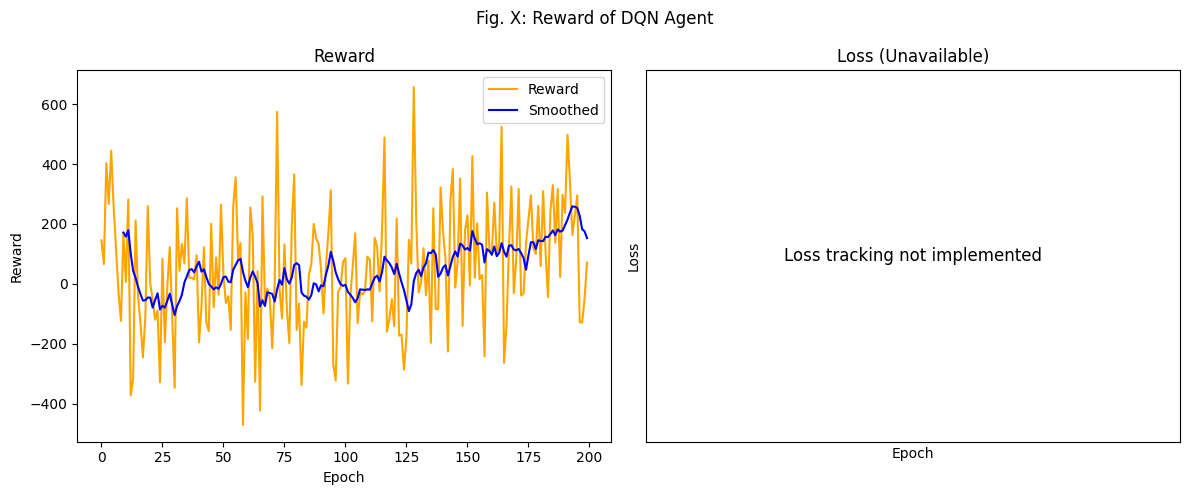

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rewards = logger_callback.episode_rewards
epochs = np.arange(len(rewards))

plt.figure(figsize=(12, 5))

# Reward Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, rewards, color="orange", label="Reward")
smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
plt.plot(np.arange(9, len(rewards)), smoothed, color="blue", label="Smoothed")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.title("Reward")
plt.legend()

# Placeholder Loss Plot (no loss data)
plt.subplot(1, 2, 2)
plt.title("Loss (Unavailable)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.text(0.5, 0.5, "Loss tracking not implemented", ha='center', va='center', fontsize=12)
plt.xticks([])
plt.yticks([])

plt.suptitle("Fig. X: Reward of DQN Agent")
plt.tight_layout()
plt.show()


In [20]:
# Convert sentiment columns to numeric
final_df["report_sentiment"] = pd.to_numeric(final_df["report_sentiment"], errors="coerce")
final_df["daily_news_sentiment"] = pd.to_numeric(final_df["daily_news_sentiment"], errors="coerce")


In [21]:
'''
Apply a rolling z‑score (e.g. 20‑day window) to both report_sentiment and daily_news_sentiment so they’re on comparable scales.

Clip outliers (e.g. beyond ±3 σ) to stabilize learning.
'''

for col in ["report_sentiment", "daily_news_sentiment"]:
    rolling_mean = final_df[col].rolling(window=20, min_periods=1).mean()
    rolling_std = final_df[col].rolling(window=20, min_periods=1).std(ddof=0)
    final_df[f"{col}_z"] = ((final_df[col] - rolling_mean) / rolling_std).clip(-3, 3)

In [22]:
final_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Adj Close,Close,High,Low,Open,Volume,quarter,report_sentiment,daily_news_sentiment,report_sentiment_z,daily_news_sentiment_z
0,NaT,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,NaN,NaN,0.000000,NaN,NaN
1,2022-04-01,1451.98486328125,1506.0,1510.0,1470.300048828125,1476.4000244140625,7284278,2023Q1,0.726230,0.000000,NaN,NaN
2,2022-04-04,1597.376220703125,1656.800048828125,1722.0999755859375,1562.550048828125,1580.0,48725485,2023Q1,0.726230,0.000000,NaN,NaN
3,2022-04-05,1550.5675048828125,1608.25,1666.699951171875,1602.0,1666.699951171875,15461291,2023Q1,0.726230,0.000000,NaN,NaN
4,2022-04-06,1495.226318359375,1550.8499755859375,1589.800048828125,1547.3499755859375,1587.699951171875,13513930,2023Q1,0.726230,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
673,2024-12-23,1801.0,1801.0,1806.0,1781.300048828125,1782.0,5522296,2025Q3,0.770711,0.807341,NaN,-0.796815
674,2024-12-24,1798.0999755859375,1798.0999755859375,1808.699951171875,1789.550048828125,1802.050048828125,7242917,2025Q3,0.770711,0.874686,NaN,0.396579
675,2024-12-26,1790.75,1790.75,1812.0,1780.75,1798.550048828125,5240839,2025Q3,0.770711,0.869924,NaN,0.244616
676,2024-12-27,1798.25,1798.25,1805.949951171875,1789.0999755859375,1794.800048828125,3629665,2025Q3,0.770711,0.868356,NaN,0.197555


In [23]:
cols_to_numeric = ["Open", "High", "Low", "Close", "Adj Close", "Volume", "report_sentiment", "daily_news_sentiment"]
for col in cols_to_numeric:
    final_df[col] = pd.to_numeric(final_df[col], errors="coerce")


In [24]:
# Remove commas and convert to numeric
final_df["Volume"] = final_df["Volume"].astype(str).str.replace(",", "").astype(float)


In [25]:
# Momentum over 5, 10, 20 days
for n in [5, 10, 20]:
    final_df[f"momentum_{n}"] = final_df["Close"].pct_change(n)

# Volatility over 10 and 20 days
for n in [10, 20]:
    final_df[f"volatility_{n}"] = final_df["Close"].pct_change().rolling(window=n).std()

# Volume flow (price_change × volume)
final_df["price_change"] = final_df["Close"].pct_change()
final_df["price_change"] = pd.to_numeric(final_df["price_change"], errors="coerce")
final_df["price_change"] = final_df["price_change"].astype(str).str.replace(",", "").astype(float)
final_df["volume_flow"] = final_df["price_change"] * final_df["Volume"]
final_df["volume_flow_ma10"] = final_df["volume_flow"].rolling(window=10).mean()


In [26]:
# Create time-lagged features for last 5 days of sentiment z-scores
K = 5
for col in ["report_sentiment_z", "daily_news_sentiment_z"]:
    for lag in range(1, K + 1):
        final_df[f"{col}_lag{lag}"] = final_df[col].shift(lag)


In [27]:
# Drop early rows with NaNs introduced by rolling/lagging
final_df_clean = final_df.dropna().reset_index(drop=True)


In [28]:
#final_df_clean.to_csv("rl_ready_sentiment_features.csv", index=False)
final_df_clean

,Date,Adj Close,Close,High,Low,Open,Volume,quarter,report_sentiment,daily_news_sentiment,...,report_sentiment_z_lag1,report_sentiment_z_lag2,report_sentiment_z_lag3,report_sentiment_z_lag4,report_sentiment_z_lag5,daily_news_sentiment_z_lag1,daily_news_sentiment_z_lag2,daily_news_sentiment_z_lag3,daily_news_sentiment_z_lag4,daily_news_sentiment_z_lag5
0,2022-07-08,1362.652222,1397.099976,1410.000000,1394.750000,1410.000000,6237015.0,2023Q2,0.733383,0.000000,...,1.732051,2.000000,2.380476,3.000000,3.000000,0.773016,-0.987840,-0.987840,1.086763,-0.988101
1,2022-07-11,1371.479126,1406.150024,1409.900024,1393.250000,1394.000000,3731416.0,2023Q2,0.733383,0.000000,...,1.527525,1.732051,2.000000,2.380476,3.000000,-0.895255,0.773016,-0.987840,-0.987840,1.086763
2,2022-07-12,1357.483032,1391.800049,1405.250000,1389.400024,1405.250000,4938487.0,2023Q2,0.733383,0.000000,...,1.362770,1.527525,1.732051,2.000000,2.380476,-0.895255,-0.895255,0.773016,-0.987840,-0.987840
3,2022-07-13,1324.369995,1357.849976,1394.199951,1354.250000,1390.000000,7972805.0,2023Q2,0.733383,0.860903,...,1.224745,1.362770,1.527525,1.732051,2.000000,-0.808400,-0.895255,-0.895255,0.773016,-0.987840
4,2022-07-14,1317.737793,1351.050049,1372.650024,1349.250000,1362.000000,5186205.0,2023Q2,0.733383,0.841832,...,1.105542,1.224745,1.362770,1.527525,1.732051,1.175455,-0.808400,-0.895255,-0.895255,0.773016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2024-10-22,1714.550049,1714.550049,1740.000000,1710.699951,1730.050049,19437640.0,2025Q3,0.770711,0.885451,...,0.654654,0.733799,0.816497,0.904534,1.000000,0.326165,-1.883487,1.429460,1.176188,0.317386
136,2024-10-23,1735.800049,1735.800049,1746.500000,1705.050049,1705.050049,19018045.0,2025Q3,0.770711,0.791001,...,0.577350,0.654654,0.733799,0.816497,0.904534,0.675112,0.326165,-1.883487,1.429460,1.176188
137,2024-10-24,1749.650024,1749.650024,1768.650024,1738.099976,1738.099976,15416129.0,2025Q3,0.770711,0.777079,...,0.500000,0.577350,0.654654,0.733799,0.816497,-1.398208,0.675112,0.326165,-1.883487,1.429460
138,2024-10-25,1743.400024,1743.400024,1757.849976,1728.699951,1755.000000,13065239.0,2025Q3,0.770711,0.925540,...,0.420084,0.500000,0.577350,0.654654,0.733799,-1.541354,-1.398208,0.675112,0.326165,-1.883487


In [29]:
final_df_clean=final_df_clean.drop(['Adj Close','Date','Volume','quarter'],axis="columns")
final_df_clean

,Close,High,Low,Open,report_sentiment,daily_news_sentiment,report_sentiment_z,daily_news_sentiment_z,momentum_5,momentum_10,...,report_sentiment_z_lag1,report_sentiment_z_lag2,report_sentiment_z_lag3,report_sentiment_z_lag4,report_sentiment_z_lag5,daily_news_sentiment_z_lag1,daily_news_sentiment_z_lag2,daily_news_sentiment_z_lag3,daily_news_sentiment_z_lag4,daily_news_sentiment_z_lag5
0,1397.099976,1410.000000,1394.750000,1410.000000,0.733383,0.000000,1.527525,-0.895255,0.032022,0.031984,...,1.732051,2.000000,2.380476,3.000000,3.000000,0.773016,-0.987840,-0.987840,1.086763,-0.988101
1,1406.150024,1409.900024,1393.250000,1394.000000,0.733383,0.000000,1.362770,-0.895255,0.037252,0.036793,...,1.527525,1.732051,2.000000,2.380476,3.000000,-0.895255,0.773016,-0.987840,-0.987840,1.086763
2,1391.800049,1405.250000,1389.400024,1405.250000,0.733383,0.000000,1.224745,-0.808400,0.028981,0.034104,...,1.362770,1.527525,1.732051,2.000000,2.380476,-0.895255,-0.895255,0.773016,-0.987840,-0.987840
3,1357.849976,1394.199951,1354.250000,1390.000000,0.733383,0.860903,1.105542,1.175455,-0.009772,0.010343,...,1.224745,1.362770,1.527525,1.732051,2.000000,-0.808400,-0.895255,-0.895255,0.773016,-0.987840
4,1351.050049,1372.650024,1349.250000,1362.000000,0.733383,0.841832,1.000000,1.168321,-0.032060,0.002263,...,1.105542,1.224745,1.362770,1.527525,1.732051,1.175455,-0.808400,-0.895255,-0.895255,0.773016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1714.550049,1740.000000,1710.699951,1730.050049,0.770711,0.885451,0.577350,0.675112,0.018081,0.038460,...,0.654654,0.733799,0.816497,0.904534,1.000000,0.326165,-1.883487,1.429460,1.176188,0.317386
136,1735.800049,1746.500000,1705.050049,1705.050049,0.770711,0.791001,0.500000,-1.398208,0.021179,0.062854,...,0.577350,0.654654,0.733799,0.816497,0.904534,0.675112,0.326165,-1.883487,1.429460,1.176188
137,1749.650024,1768.650024,1738.099976,1738.099976,0.770711,0.777079,0.420084,-1.541354,0.045722,0.052484,...,0.500000,0.577350,0.654654,0.733799,0.816497,-1.398208,0.675112,0.326165,-1.883487,1.429460
138,1743.400024,1757.849976,1728.699951,1755.000000,0.770711,0.925540,0.333333,1.479137,0.036597,0.055966,...,0.420084,0.500000,0.577350,0.654654,0.733799,-1.541354,-1.398208,0.675112,0.326165,-1.883487


In [30]:
from sklearn.preprocessing import StandardScaler

# Select only numeric feature columns (excluding Date or strings)
feature_columns = [col for col in final_df_clean.columns]

# Initialize scaler and fit-transform
scaler = StandardScaler()
final_df_clean[feature_columns] = scaler.fit_transform(final_df_clean[feature_columns])


In [33]:
#final_df_clean
final_df_clean.to_csv("rl_ready_features.csv", index=False)

In [31]:
from stable_baselines3.common.callbacks import BaseCallback

class LossLoggerCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.losses = []

    def _on_step(self) -> bool:
        # Access logger output
        if "train/loss" in self.logger.name_to_value:
            loss = self.logger.name_to_value["train/loss"]
            self.losses.append(loss)
        return True

loss_logger = LossLoggerCallback()

In [32]:
from stable_baselines3.common.callbacks import CallbackList

train_logger = TrainLoggerCallback()

# The new loss-logging callback
loss_logger = LossLoggerCallback()

# Combine both
combined_callback = CallbackList([train_logger, loss_logger])

In [35]:
# Upload your preprocessed CSV with correct columns
from stable_baselines3 import PPO

df2 = pd.read_csv("/content/rl_ready_features.csv")
df2 = df2.dropna()

# Create environment
env = StockTradingEnv(df2, window_size=5)
check_env(env)

# Train
logger_callback = TrainLoggerCallback()
model = PPO("MlpPolicy", env, verbose=1, learning_rate=1e-4, batch_size=32)


steps_per_episode = len(df2) - 5 - 1
total_timesteps = steps_per_episode * 200
model.learn(total_timesteps=total_timesteps, callback=combined_callback)
#model.learn(total_timesteps=10000, callback=logger_callback)
model.save("ppo_hdfc_model_changed")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | 1.92     |
| time/              |          |
|    fps             | 749      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 134          |
|    ep_rew_mean          | 2.13         |
| time/                   |              |
|    fps                  | 440          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0047069797 |
|    clip_fraction        | 0.0064       |
|    clip_range           | 0.2          |
|    en

ValueError: v cannot be empty

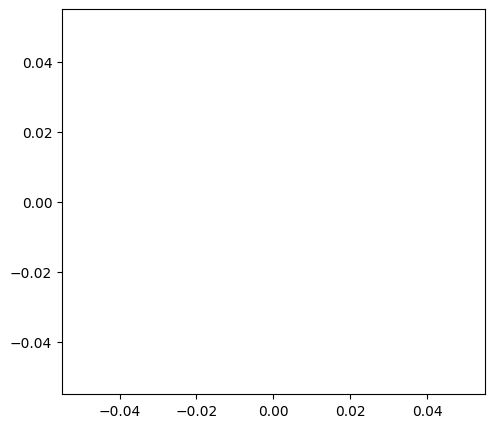

In [36]:
import matplotlib.pyplot as plt
import numpy as np

rewards = logger_callback.episode_rewards
epochs = np.arange(len(rewards))

plt.figure(figsize=(12, 5))

# Reward Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, rewards, color="orange", label="Reward")
smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
plt.plot(np.arange(9, len(rewards)), smoothed, color="blue", label="Smoothed")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.title("Reward")
plt.legend()

plt.suptitle("Fig. X: Reward of PPO Agent")
plt.tight_layout()
plt.show()


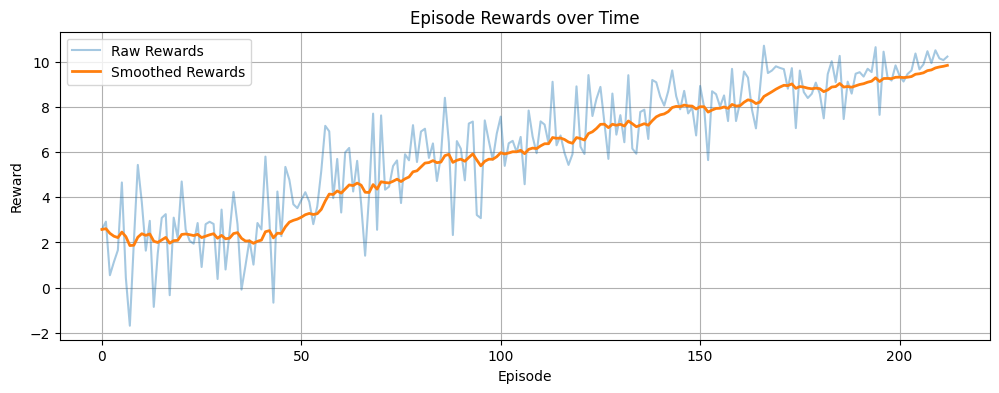

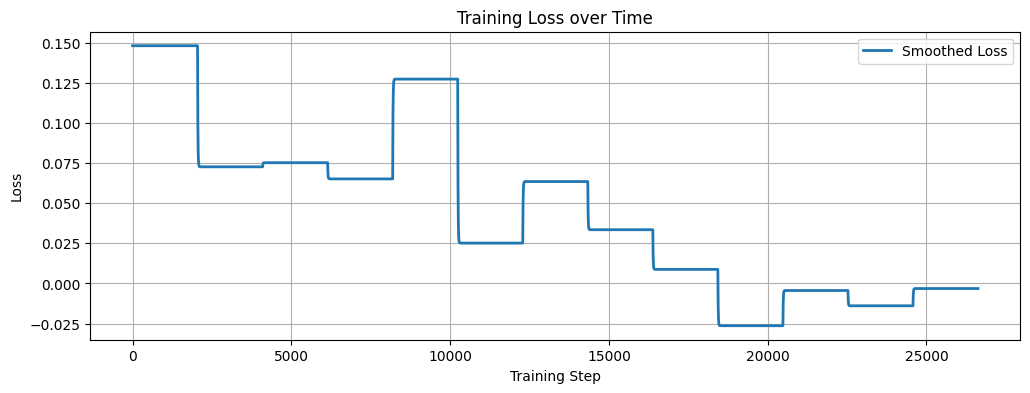

In [38]:
import matplotlib.pyplot as plt

# Extract data from callbacks
rewards = train_logger.episode_rewards
losses = loss_logger.losses

# Optional: smoothing function
def smooth(data, weight=0.9):
    if not data:
        return []
    smoothed = []
    last = data[0]
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

# Smooth reward and loss
smoothed_rewards = smooth(rewards)
smoothed_losses = smooth(losses)

# Plot Rewards
plt.figure(figsize=(12, 4))
plt.plot(rewards, label="Raw Rewards", alpha=0.4)
plt.plot(smoothed_rewards, label="Smoothed Rewards", linewidth=2)
plt.title("Episode Rewards over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

# Plot Losses
plt.figure(figsize=(12, 4))
#plt.plot(losses, label="Raw Loss", alpha=0.4)
plt.plot(smoothed_losses, label="Smoothed Loss", linewidth=2)
plt.title("Training Loss over Time")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
